# PA 1.3: Data Cleaning and Boosting Productivity

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.3. Due: before Friday, Sep 20, 2023.*

This notebook consists of two parts:

1. Data Cleaning, with task 1.1 - 2.6
2. Boosting Productivity, with task 3.1 - 3.10

**Remember that there is a survey that must be completed to pass this PA.**

[Here is a link to the survey](https://forms.office.com/e/saRwPUyL8d).

## Data cleaning

Often we get data in a file that contains unexpected and odd things inside. If not removed in a proper way, they can cause problems in our analysis. For example, NaNs, infinite values, or just really large outliers may cause things in our code to behave in an unexpected way. It is good practice to **get in the habit of visualizing and processing datasets before you start using them!** This programming assignment will illustrate this process.

Topics in this assignment includes two tasks: 
1. Finding "odd" values in an array and removing them
2. Using plots to identify other "oddities" that can be removed

We will need one csv file, `data_2.csv`, to complete this assignment.

In [1]:
# use the mude-base environment

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import scipy.optimize as opt

### Task 1: Importing and Cleaning the array

In a previous week we looked at how to read in data from a csv, plot a nice graph and even find the $R^2$ of the data. This week an eager botany student, Johnathan, has asked us to help him analyze some data: 1000 measurements have just been completed over the 100m of greenhouse and are ready to use in `data_2.csv`. Johnathan happens to have a lot of free time but not that much experience taking measurements. Thus, there is some noise in the data and some problematic data that are a result of an error in the measurement device. Let's help them out!

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Import the data as 2 numpy arrays: distance and temperature.
</p>
</div>

In [2]:

data = np.loadtxt('data_2.csv', dtype=str, delimiter=',', skiprows=1)

distance, temperature = data[:,0], data[:,1]
def is_number(s):
    try: 
        float(s)
        return True
    except ValueError:
        return False
temperature = np.array([float(val)if is_number(val) else np.nan for val in temperature])
distance=distance.astype(float)
print(distance)
print(temperature)


[  0.      0.1     0.2     0.3     0.4     0.501   0.601   0.701   0.801
   0.901   1.      1.1     1.2     1.3     1.4     1.5     1.6     1.7
   1.8     1.9     2.      2.1     2.2     2.3     2.4     2.5     2.6
   2.7     2.8     2.9     3.      3.1     3.2     3.3     3.4     3.5
   3.6     3.7     3.8     3.9     4.      4.1     4.2     4.3     4.4
   4.5     4.6     4.7     4.8     4.9     5.01    5.11    5.21    5.31
   5.41    5.51    5.61    5.71    5.81    5.91    6.01    6.11    6.21
   6.31    6.41    6.51    6.61    6.71    6.81    6.91    7.01    7.11
   7.21    7.31    7.41    7.51    7.61    7.71    7.81    7.91    8.01
   8.11    8.21    8.31    8.41    8.51    8.61    8.71    8.81    8.91
   9.01    9.11    9.21    9.31    9.41    9.51    9.61    9.71    9.81
   9.91   10.     10.1    10.2    10.3    10.4    10.5    10.6    10.7
  10.8    10.9    11.     11.1    11.2    11.3    11.4    11.5    11.6
  11.7    11.8    11.9    12.     12.1    12.2    12.3    12.4    12.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
In the code cell below, evaluate the size of the array.
</p>
</div>

In [3]:
distance.size
temperature.size


1000

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
 Check by defining a variable <code>boolean</code> using the numpy method <code>isnan</code>, which returns a boolean vector (False if it is not a NaN, and True if it is a NaN). The code block below will also help you inspect the results.
</p>
</div>

In [4]:
boolean = np.isnan(temperature)

print("The first 10 values are:", boolean[0:10])
print(f"There are {boolean.sum()} NaNs in array temperature")


The first 10 values are: [False False False False False False False False False False]
There are 3 NaNs in array temperature


Let's slice the array using the `boolean` array we just found to eliminate the NaNs. We can use the symbol `~`, which denotes the opposite: we want to keep those where np.isnan gives False as an answer.

In [5]:
temperature = temperature[~boolean]

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4:</b>   
Check the size again, and make sure you recognize that we over-wrote the variable `temperature`. This will have an impact on other cells where you use this variable, for example, if you re-run the cell below Task 1.3, the result will be different, because the array contents have changed!

How big is the array now? How many values were removed?
</p>
</div>

In [6]:
temperature.size

997

But now we have a problem: our `distance` array still has the entries that correspond to the bad entries in `temperature`. We can see that the dimensions of the arrays no longer match:

In [7]:
distance.size==temperature.size

False

Also, we don't know what the index of the removed values were, since we over-wrote `temperature`! Luckily we have our `boolean` array, which records the indices with Nans, which we can also use to update our `distance` array.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.5:</b>   
Use the boolean array from Task 1.3 to remove the matching entries in the distance array, then check that it has the same length as temperature.
</p>
</div>

In [8]:
boolean = ~np.isnan(temperature)
distance = distance[:boolean.sum()]
distance.size==temperature.size
#DO NOT KNOW IF I DID THIS RIGHT 

True

### Task 2: Visualizing the Dataset

Now we can plot the temperature with distance to see what it looks like.

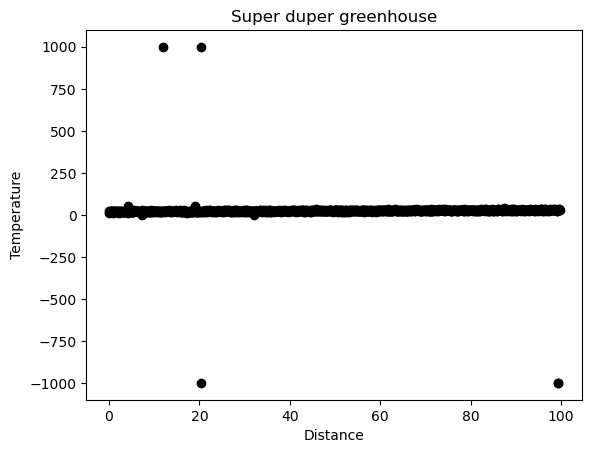

In [9]:
plt.plot(distance, temperature, "ok", label = 'Temperature')
plt.title("Super duper greenhouse")
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.show()

It looks like there are some outliers in the dataset still! Let's investigate:

In [10]:
print(temperature.min())
print(temperature.max())

-999.0
999.0


The values are suspcious since they are +/-999...this is a common error code with some sensors, so we can assume that they can be removed from the dataset. We can easily remove these erroneous values of temperature, but this time we will use a different method than before. The explamation mark before an equals sig, `!=`, denotes "not equal to." We can use this as a logic operator to directly eliminate the values in one line. For example:
```
array_1 = array_1[array_2!=-999]
```

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Use the "not equal to" operator to re-define temperature and distance such that all the temperatures with -999 are removed (don't do the +999 values yet!). Keep in mind that the order of the arrays matters: if you reassign temperature, you won't have the information any more to fix distance!!!
</p>
</div>

In [11]:
distance = distance[temperature!=-999]
temperature = temperature[temperature!= -999] #DO NOT UNDERSTAND HOW IT GOES 

print(temperature.min())
print(distance.min())

0.0
0.0


Are the arrays the same size still? If you did it correctly, they should be.

In [12]:
print(distance.size==temperature.size)
temperature.size

True


994

For the +999 values we will use yet another method, a combination of the previous two.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
    Use the not equal to operator <b>and</b> a boolean array to define an array "mask" that will help you remove the data corresponding to temperatures with +999.
</p>
</div>

We can also do it with a boolean for data_y.

In [13]:
mask = temperature!= +999
distance = distance[mask]
temperature = temperature[mask]

The array is names "mask" because this process utilizes **masked arrays**...you can read more about it [here](https://python.plainenglish.io/numpy-masks-in-python-d8c13509fbc8).

Anyway, now that we have removed the annoying +/-999 values, we can finally start to see our dataset more clearly:

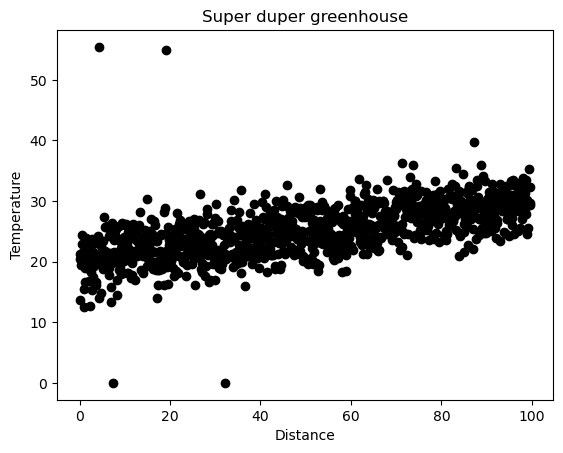

In [14]:
plt.plot(distance, temperature, "ok", label = 'Temperature')
plt.title("Super duper greenhouse")
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.show()

Looks good! But wait---there also appear to be some values in the array that are not physically possible! We know for sure that there was nothing cold in the greenhouse during the measurements; also it's very likely that a "0" value could have come from an error in the sensor.

See if you can apply the `numpy` method `nonzero` to remove zeros from the array. Hint: it works in a very similar way to `isnan`, which we used above.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3:</b>   
    Use <code>nonzero</code> to remove the zeros.
</p>
</div>

In [15]:
distance = distance[np.nonzero(temperature)]
temperature = temperature[np.nonzero(temperature)]

It also seems quite obvious that the values above 50 degrees are also not physically possible (or perhaps Jonathan was standing near an oven?!). In any case, they aren't consistent with the rest of the data, so we should remove them.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.4:</b>   
    Use an inequality, <code><</code> to keep all values less than 50.
</p>
</div>

In [16]:
mask_1= temperature < 50
distance = distance[mask_1]
temperature = temperature[mask_1]

Now let's take another look at our data:

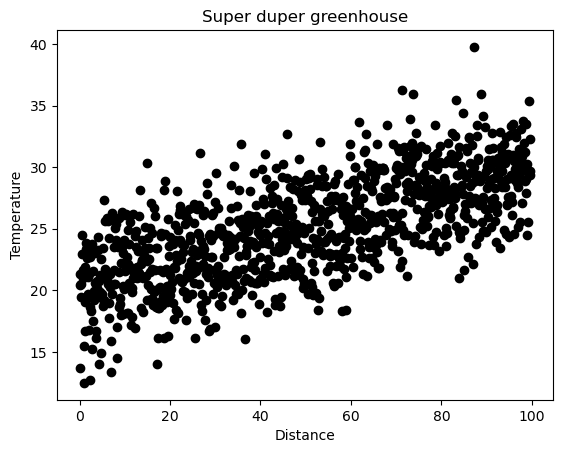

In [17]:
plt.plot(distance, temperature, "ok", label = 'Temperature')
plt.title("Super duper greenhouse")
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.show()

Let's pretend there is a systematic error in our measurement device because it was not properly calibrated. It causes all observations below 15 degrees need to be corrected dividing the multiplying the measurement by 1.5. Numpy actually makes it very easy to change the contents of an array conditionally by replacement using the `where` method!

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.5:</b>   
    Play with the cell below to understand what the <code>where</code> method does (i.e., replacement)---it's very useful to know about!
</p>
</div>

In [18]:
temperature = np.where(temperature>15, temperature, temperature*1.5)


Remember you can investigate the `where` function in a notebook easily by executing `np.where?`. Try it and read the documentation!

Let's plot the array again to see what happened (you'll have to compare the two plots carefully to see the difference). Remember, that if you rerun the cell above many times, it will over-write `temperature`, so you will probably need to restart the kernel a few times to reset the values.

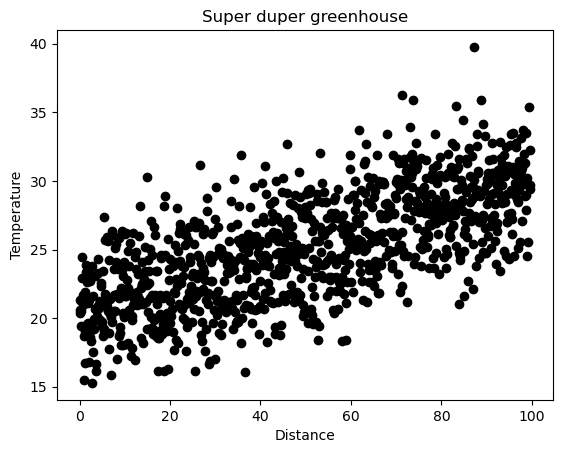

In [19]:
plt.plot(distance, temperature, "ok", label = 'Temperature')
plt.title("Super duper greenhouse")
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.show()

Now that we are done cleaning the data, let's learn about it. 

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.6:</b>   
    Calculate the mean and variance of temperature. Use built-in numpy functions.
</p>
</div>

In [20]:
mean_temperature = np.mean(temperature)
variance_temperature = np.var(temperature)
print(mean_temperature)
print(variance_temperature)

25.15701923076923
16.103195948010747


## Boosting productivity

Did you ever got frustrated by sharing code with your friends? How nice would it be to do it the Google-Docs style and work on the same document simultaneously! Maybe you know Deepnote, which does this in an online interface. But there's a better solution: [Visual Studio Live Share](https://visualstudio.microsoft.com/services/live-share/)!

In this PA you'll install the required extension in VS Code. You'll use this extension on Wednesday in class, and can freely use it in your future career!

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
    Download, install and login in the Visual Studio Live Share Extension from the Visual Studio Marketplace as explained in the <a href="https://mude.citg.tudelft.nl/2024/book/external/learn-programming/book/install/ide/vsc/vs_live_share.html">book</a>
</p>
</div>

After installing and signing into Visual Studio Live Share, you'll share a project with yourself to test the collaboration session

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
    Use your normal workflow to open a folder
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>   
    Start a collaboration session: select <strong>Live Share</strong> on the status bar or select <strong>Ctrl+Shift+P</strong> or <strong>Cmd+Shift+P</strong> and then select <strong>Live Share: Start collaboration session (Share)</strong>.
</p>
<img src="https://learn.microsoft.com/en-us/visualstudio/liveshare/media/install-live-share-visual-studio-code/live-share-button-status-bar.png" alt="Live Share Button">
<p>
The first time you share, your desktop firewall software might prompt you to allow the Live Share agent to open a port. Opening a port is optional. It enables a secured direct mode to improve performance when the person you're working with is on the same network as you. For more information, see <a href="https://learn.microsoft.com/en-us/visualstudio/liveshare/reference/connectivity#changing-the-connection-mode">changing the connection mode</a>.
</p>
</div>

An invitation link will be automatically copied to your clipboard. You'll use this link to interact with yourself in this assignment. If you want to collaborate with other, you can share this link with other to open up the project in their browser on own VS Code.

You'll also see the **Live Share** status bar item change to represent the session state.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b>   
    Copy the invitation link in your web browser.
</p>
</div>

A web version of Visual Studio Code will open in your browser. Continue there.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.5:</b>   
    Login using the same steps as in task 3.2.
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.6:</b>   
    Go back to your desktop participant of VS code and try typing a few lines of correct code in the cell below. Do you see the same change in the browser happening live?
</p>
</div>

In [21]:
print(temperature)

[20.4   20.565 21.32  19.43  20.54  22.95  24.46  21.67  20.98  18.735
 15.5   21.91  16.72  19.03  23.34  23.85  22.66  19.57  19.68  21.09
 16.8   21.31  19.08  22.73  18.64  18.35  23.16  23.77  15.28  21.59
 17.5   19.81  19.92  19.23  20.64  23.05  16.16  16.67  20.18  20.79
 23.3   24.31  21.03  20.74  19.85  21.26  22.57  22.32  19.69  19.4
 23.41  18.72  19.03  19.24  27.35  25.66  21.77  21.48  21.59  25.9
 20.91  25.62  20.53  18.94  24.25  17.76  21.37  20.28  15.89  20.1
 19.71  26.32  26.03  20.55  23.56  21.67  25.08  20.49  25.4   24.11
 21.78  17.03  23.64  23.55  25.86  18.67  21.48  19.39  18.9   18.01
 22.22  26.33  23.54  23.05  18.06  20.37  20.08  24.09  21.6   26.11
 21.62  26.23  18.14  22.75  22.16  24.87  18.18  23.79  20.6   25.51
 21.92  17.23  21.84  19.85  17.86  20.17  26.18  20.99  21.42  24.43
 16.94  24.85  23.56  21.67  21.88  20.99  23.2   21.51  26.02  21.43
 28.14  21.05  18.56  22.17  24.08  22.39  22.5   18.21  21.02  22.73
 22.84  23.45  25.16  

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.7:</b>   
    Go back to your browser version of VS code and try running the cell. Note that this requires Requesting access in the browser participant. Request that access and approve it in the desktop participant of VS code. In the desktop participant you now need to select your python environment. Does the cell run? Do you see the output in both participants? Make sure the output doesn't show an error!
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.8:</b>   
    Let's try to make sense of what's happening. Where is the code executed? Run the following code cell from the browser participant. On which computer does this collaborative session run?
</p>
</div>

In [22]:
import platform
print("Running on a", platform.system(),"machine named:", platform.node())

Running on a Windows machine named: LAPTOP-075MT6CP


That's cool right? Imagine what you could do with this...

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.9:</b>   
    Explore some of the functionalities of the Live Share (session chat, following). More information can be found <a href="https://learn.microsoft.com/en-us/visualstudio/liveshare/">here</a>.
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.10:</b>   
    Stop the collaboration session on the desktop-participant by opening the Live Share view on the <strong>Explorer</strong> tab or the <strong>VS Live Share tab</strong> and select the <strong>Stop collaboration session</strong> button:
</p>
<img src="https://learn.microsoft.com/en-us/visualstudio/liveshare/media/vscode-end-collaboration-viewlet.png">
<p>
Your web-participant will be notified that the session is over. It won't be able to access the content and any temp files will automatically be cleaned up. Don't forget to save your work on the desktop-participant!
</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.